# Machine Learning: Regression

Supervised Machine Learning algorithms consist of target / outcome variable (or dependent variable) which is to be predicted from a given set of features/predictors (independent variables). Using these set of features, we generate a function that map inputs to desired outputs. The training process continues until the model achieves a desired level of accuracy/performance score on the training data. An supervised learning problem is called **Regression** where the output variable is *continuous valued*.


## Objective of this notebook

In this notebook you will explore machine learning regression with Python Scikit-Learn library.

For questions, comments and suggestions, please contact parantapa[dot]goswami[at]viseo[dot]com

## Import basic libraries
Initially we require:
1. pandas: to store data efficiently
2. numpy: to matrix operations
3. matplotlib.pyplot: for data visualization

In [1]:
# Write code to import required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# For visualzing plots in this notebook
%matplotlib inline

## Housing Price Dataset

This small dataset is a collection of housing prices in Portland, Oregan, USA. It contains collected information on some houses sold and the prices.

Each house is described with following features:
1. size of the house in square feet
2. number of bedrooms

House prices are in US dollars.

### Importing the data
The data is provided in the file **`housing_price.txt`**. Use `read_csv()` module from pandas to import the data.

In [2]:
# We start by importing the data using pandas
# Hint: use "read_csv" method, Note that comma (",") is the field separator, and we have no "header"
housing = pd.read_csv('housing_price.txt', sep=",", header=None) 

# We name the columns based on above features
housing.columns = ["Area", "Bedrooms", "Price"]

# We sneak peek into the data
# Hint: use dataframe "head" method with "n" parameter
housing.head(n=5) 

,Area,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Statistical summary of the data
Sometimes it is better to have a statistical summary of the data at hand. Use **`DataFrame.describe()`** to get a summary of the data with various statistical quantities.

In [3]:
# Write code to get a summary of the data
# Hint: use "DataFrame.describe()" on our dataframe housing
housing.describe() 

,Area,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


### Visualize the data
Initially, we will use only **Area** to predict **Price**. So, it is recommended to visualize **Area** against **Price**.

As, we wish to see correlation between two continuous variables, we will use scatter plot.

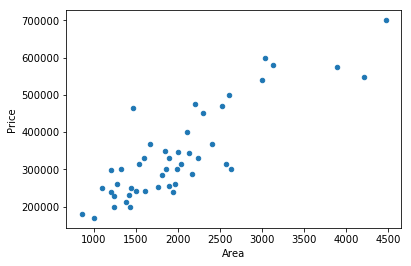

In [4]:
# Write code to create Scatter Plot between "Area" and "Price"
# Hint: use "DataFrame.plot.scatter()" on our dataframe housing,
#       mention the "x" and "y" axis features
housing.plot.scatter(x="Area", y="Price") 

## Training a Univariate Linear Regression Model
You will now train a Linear Regression model using "Area" feature to predict "Price".

**Note**: All machine learning algorithm implementations work efficiently with numpy matrices and arrays. The current format of our data is pandas dataframes. Fortunately, pandas provides [**`DataFrame.as_matrix()`**](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.as_matrix.html) method to convert dataframes to numpy arrays. It accepts `columns` attribute to convert only certain columns of the dataframe.

**Question**: What is your input **`X`** here? What is your output **`y`** here?

In [5]:
# Write code to convert desired dataframe columns into numpy arrays
# Hint: "columns" atttribute of DataFrame.as_matrix() accepts only list.
#       Even if you wish to select only one column, you have to pass it in a list.
X = housing.as_matrix(columns=["Area"]) 
y = housing.as_matrix(columns=["Price"])

Using the following step, train a Linear Regression model on housing price dataset:
1. import [**`LinearRegression`**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module from `sklearn`
2. create an instance of `LinearRegression` and fit with the X and y arrays you created

In [6]:
# Write code to learn a linear regression model on housing price dataset
from sklearn.linear_model import LinearRegression # TO DELETE

lin_reg = LinearRegression() 
lin_reg.fit(X, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Use your trained `LinearRegression` model to predict on the same dataset (i.e. "Area" features stored as numpy array `X`). Also calculate **Mean Squared Error** using the [`mean_squared_error()`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) method from `sklearn` library.

In [7]:
# Write code to predict prices using the trained LinearRegression
y_predicted = lin_reg.predict(X) 

# Importing modules to calculate MSE
from sklearn.metrics import mean_squared_error

# Write code to calculate and print the MSE on the predicted values.
# Hint 1: use "mean_squared_error()" method
# Hint 2: you have to pass both original y and predicted y to compute the MSE.
mse = mean_squared_error(y, y_predicted) 
print("MSE = ", mse)

MSE =  4116265480.87


**Question**: Why such a huge MSE?

Use **`LinearRegression.score()`** method to get **coefficient of determination $R^2$ of the prediction**. It is calculated based on MSE. The best possible score is $1.0$ and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of $y$, disregarding the input features, would get a $R^2$ score of $0.0$.

**<font color=red>Warning</font>**: You need to pass input matrix X and **original** output y to `score()` method. This method first performs testing with the trained model and then calculates the $R^2$ score.

In [8]:
# Write code to get coefficient of determination using "score()"
# Hint: you have to pass both X and original y to score()
R2 = lin_reg.score(X, y) 
print("R2 = ", R2)

R2 =  0.731003783976


Now, we will visualize the predicted prices along with the actual data.

**Note**: `DataFrame.plot.scatter()` returns a `axes` object. You can use that `axes` object to add more visualizations to the same plot.

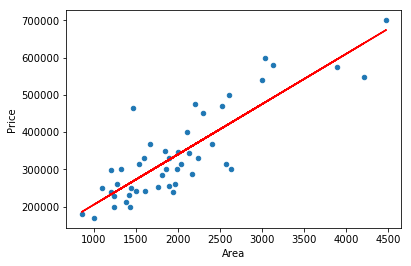

In [9]:
# Write code to create a scatter plot with the data as above.
#       Then add the best line to that.
# Hint 1: store the returned "axes" object and then use "axes.plot()"
#         to plot the best_line
# Hint 2: "axes.plot()" takes the X and the y_predicted arrays
ax = housing.plot.scatter(x="Area", y="Price") 
ax.plot(X, y_predicted, "r") 

## Training a Multivariate Linear Regression Model

You will now train a Linear Regression model using both "Area" and "Bedrooms" features to predict "Price".

**Question**: What is your input X here? What is your output y here?

Note that only your input changes. Nothing else changes in your implmentation.

In [10]:
# Write code to convert desired dataframe columns into numpy arrays
X = housing.as_matrix(columns=["Area","Bedrooms"]) 
y = housing.as_matrix(columns=["Price"]) 

# Write code to train a LinearRegression model
lin_reg = LinearRegression() 
lin_reg.fit(X, y) 

# Write code to calculate and print the MSE
R2 = lin_reg.score(X, y) 
print("R2 = ", R2)

R2 =  0.732945018029


### Homework

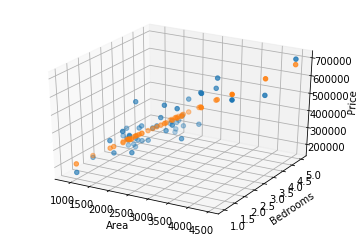

In [14]:
# Write code to create a 3D scatter plot for "Area", "Bedroom" and actual "Price"
# Then add visualization of "Area" and "Bedroom" against the predicted price.
from mpl_toolkits.mplot3d import Axes3D

y_pred = lin_reg.predict(X)
fig_scatter = plt.figure() 
ax = fig_scatter.add_subplot(111, projection='3d') 
ax.scatter(housing["Area"], housing["Bedrooms"], housing["Price"]) 
ax.scatter(housing["Area"], housing["Bedrooms"], y_pred)

ax.set_xlabel("Area") 
ax.set_ylabel("Bedrooms") 
ax.set_zlabel("Price") 

# Supplementary Material

This portion of the notebook is for your own practice. Do not hesitate to contact me for any question.


## Energy Efficiency Dataset 

This dataset poses the regression problem of predicting heating load of different buildings. More details of this dataset can be found in [this link](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency). The buildings are described using following 8 features:
1. Relative Compactness 
2. Surface Area 
3. Wall Area 
4. Roof Area 
5. Overall Height 
6. Orientation 
7. Glazing Area 
8. Glazing Area Distribution

### Import the data
The data is provided in the file **energy_efficiency.csv**. Like before, use read_csv() module from pandas to import the data.

In [15]:
# Write code to import the data using pandas
# Hint: note that comma (",") is the field separator, and we have no "header"
energy = pd.read_csv("energy_efficiency.csv", sep=",", header=None) 

# We name the columns based on above features
energy.columns = ["Compactness","Surface","Wall", "Roof", "Heiht",
              "Orientation","Glazing","GlazingDist", "Heating"]

# We sneak peek into the data
# Hint: use dataframe "head" method with "n" parameter
energy.head(n=5) 

,Compactness,Surface,Wall,Roof,Heiht,Orientation,Glazing,GlazingDist,Heating
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


## Regression Models on Energy Efficiency Dataset

In this section, we will train various regression models on the Energy Efficiency Dataset. We will measure the performances in terms of $R^2$ and compare their performances.

### Inputs and Outputs

First, identify the inputs and outputs, and convert them to numpy matrices.

In [16]:
# Write code to convert desired dataframe columns into numpy arrays
X = energy.as_matrix(columns=["Compactness","Surface","Wall", "Roof", "Heiht",
                            "Orientation","Glazing","GlazingDist"]) 
y = energy.as_matrix(columns=["Heating"]) 

### Training Set and Testing Set

A portion of the dataset is to be set aside to be used only for testing. Fortunately `sklearn` provides a [**`train_test_split()`**](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) module to do that. You can specify a ratio for `test_size` parameter. 

In this exercise, we will retain $20\%$ data for testing.

In [17]:
# Importing the module
from sklearn.model_selection import train_test_split

# Write code for splitting the data into train and test sets.
# Hint: use "train_test_split" on X and y, and test size should be 0.2 (20%)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

### LinearRegression

Train a LinearRegression model.
1. Create an instance of LinearRegression of sklearn
1. Use training set `X_train` and `y_train` to fit.
2. Use test set `X_test` and `y_test` to measure $R^2$ using `score` method.

In [21]:
# Write code to train a Linear Regression model and to test its performance on the test set
lin_reg = LinearRegression() 
lin_reg.fit(X_train, y_train) 
lin_reg_R2 = lin_reg.score(X_test, y_test) 

print("Linear Regression R2 = ", lin_reg_R2)

Linear Regression R2 =  0.915218668108


### Support Vector Regression (SVR)

Use [**`SVR`**](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) module from `sklearn`.

In [22]:
# Write code to import necessary module for SVR
from sklearn.svm import SVR 

# Write code to train a SVR model and to test its performance on the test set
svr = SVR() # TO DELETE
svr.fit(X_train, y_train) 
svr_R2 = svr.score(X_test, y_test) 

print("Support Vector Regression R2 = ", svr_R2)

Support Vector Regression R2 =  0.868650279485


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Random Forest Regressor

Use [**`RandomForestRegressor`**](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) from `sklearn` library.

In [23]:
# Write code to import necessary module for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor 

# Write code to train a RandomForestRegressor model and to test its performance on the test set
rfr = RandomForestRegressor() 
rfr.fit(X_train, y_train) 
rfr_R2 = rfr.score(X_test, y_test) 

print("Random Forest Regressor R2 = ", rfr_R2)

Random Forest Regressor R2 =  0.997746422187


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
